In [1]:
%matplotlib notebook
import pandas as pd

In [2]:
ls

 basic_data.ipynb   faithful.txt   LICENSE    'Recommender systems.ipynb'
 clustering.ipynb   iris.txt       README.md   requirements.txt


In [3]:
iris = pd.read_csv('iris.txt', delimiter='\t')
iris[:2]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1


In [4]:
faith = pd.read_csv('faithful.txt', delimiter='\t')
faith[:5]

,eruptions,waiting
0,3.600,79.0
1,1.800,54.0
2,3.333,74.0
3,2.283,62.0
4,4.533,85.0


<IPython.core.display.Javascript object>


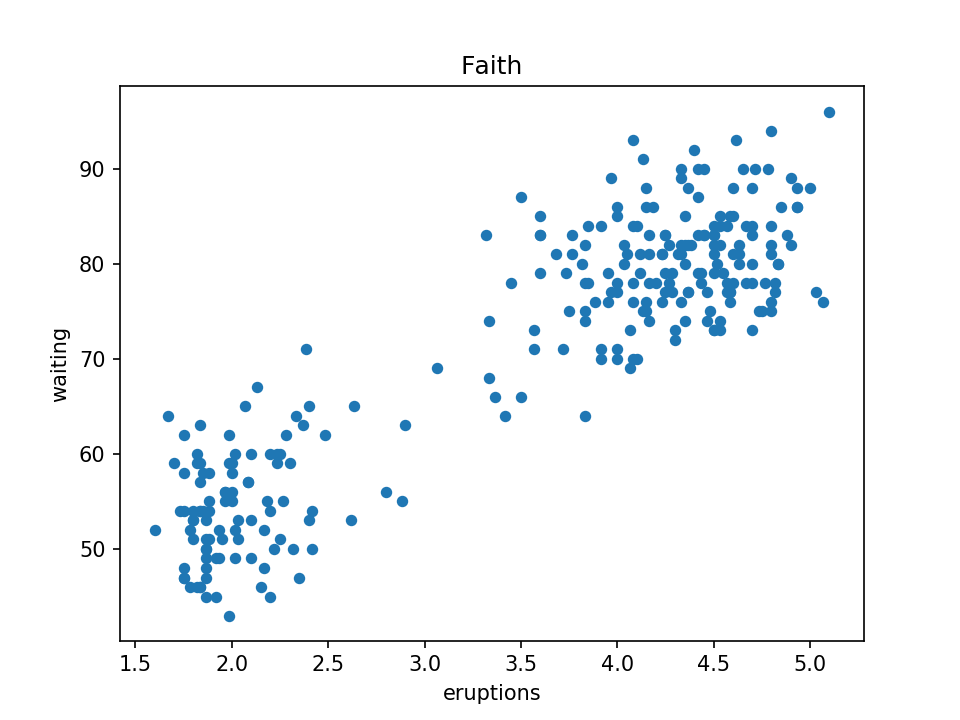

In [5]:
faith.plot.scatter('eruptions', 'waiting', title='Faith')

In [6]:
# Picking random centers of the clusters

clusters = faith.sample(2)
clusters = clusters.assign(color = ['red', 'pink'])
clusters


,eruptions,waiting,color
30,4.3,73.0,red
18,1.6,52.0,pink


<IPython.core.display.Javascript object>


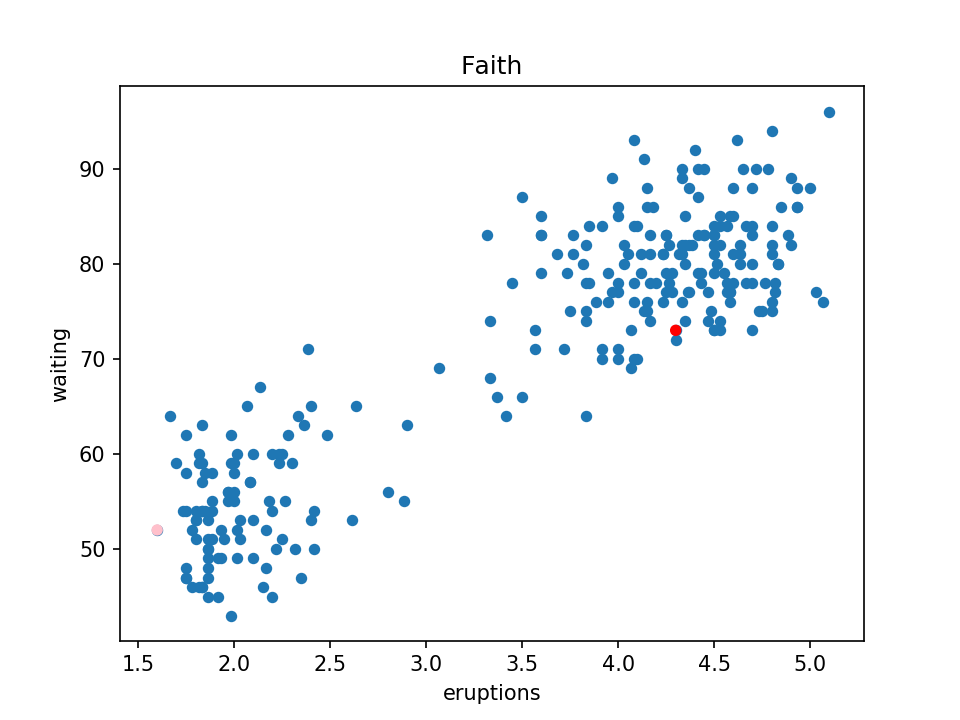

In [7]:
plt = faith.plot.scatter('eruptions', 'waiting', title='Faith')
clusters.plot.scatter('eruptions', 'waiting', ax=plt, color=clusters['color'])

## Assigning points to clusters

Now we need to add k columns to the dataset: for every line calculate the distance to every cluster, add separate column for the closest. Add winning color.  




In [8]:
win_colors = []
for point in faith.itertuples():
    win_cluster = None
    win_score = float('inf')
    
    for i, cl in enumerate(clusters.itertuples()):
        dist = ((point.eruptions - cl.eruptions)**2 + (point.waiting - cl.waiting)**2)**(1/2)
        if dist < win_score:
            win_cluster = cl
            win_score = dist
    win_colors.append(win_cluster.color)
        
        
faith['win_color'] = win_colors
faith[:10]

,eruptions,waiting,win_color
0,3.600,79.0,red
1,1.800,54.0,pink
2,3.333,74.0,red
3,2.283,62.0,pink
4,4.533,85.0,red
5,2.883,55.0,pink
6,4.700,88.0,red
7,3.600,85.0,red
8,1.950,51.0,pink
9,4.350,85.0,red


<IPython.core.display.Javascript object>


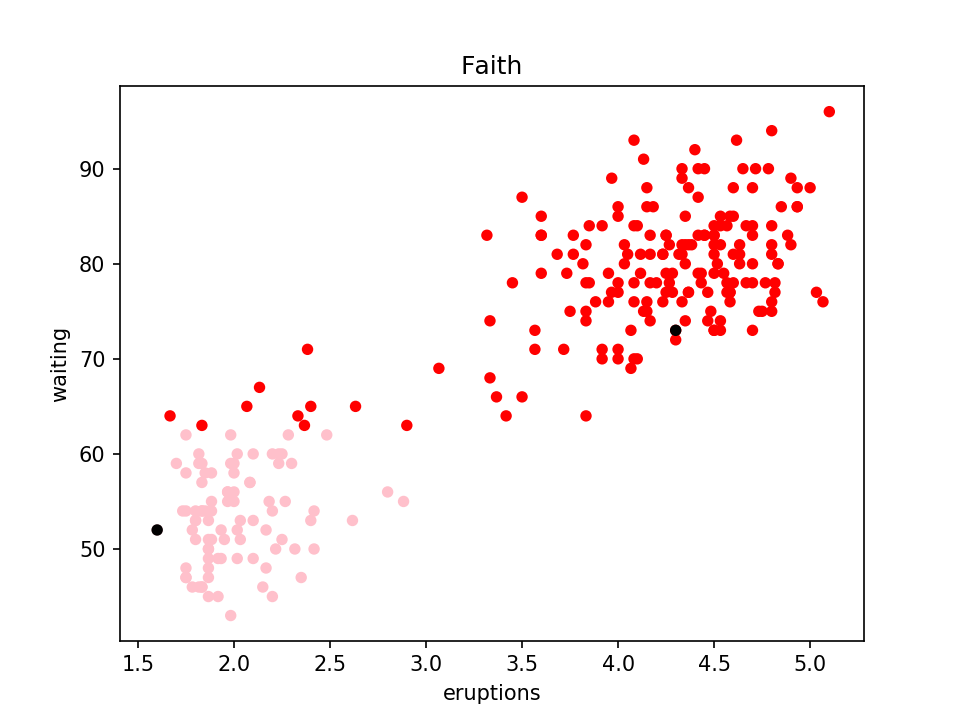

In [9]:
plt = faith.plot.scatter('eruptions', 'waiting', title='Faith', color=faith['win_color'])
clusters.plot.scatter('eruptions', 'waiting', ax=plt, color=['black', 'black'])

## Recalculating centers

Now we need to rebalance each of the clusters so that is in the center of the points holding its color


<IPython.core.display.Javascript object>


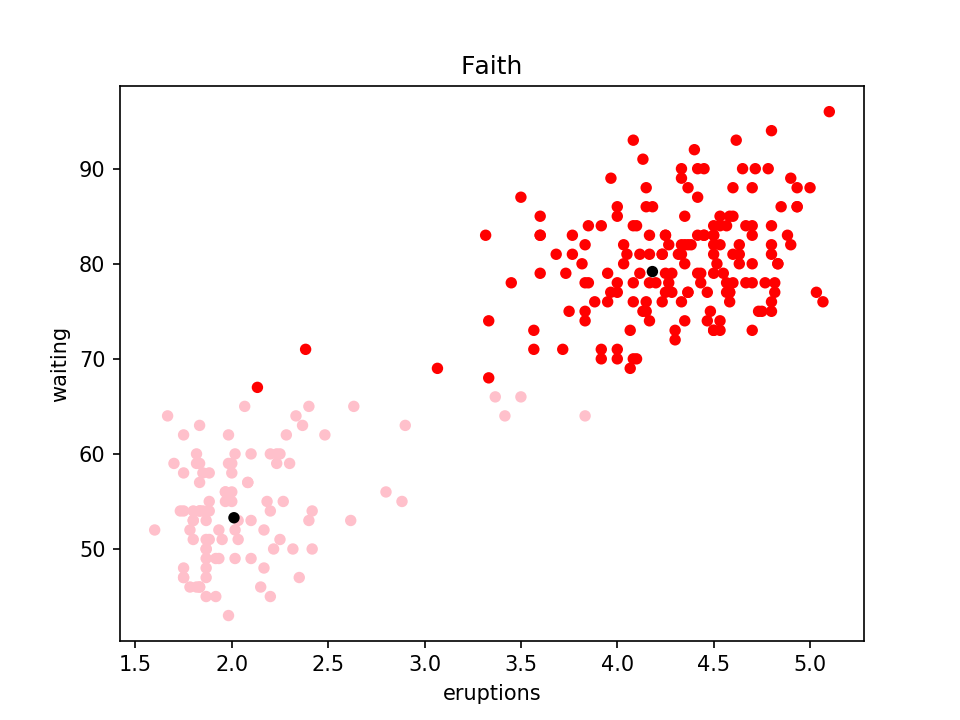

<IPython.core.display.Javascript object>


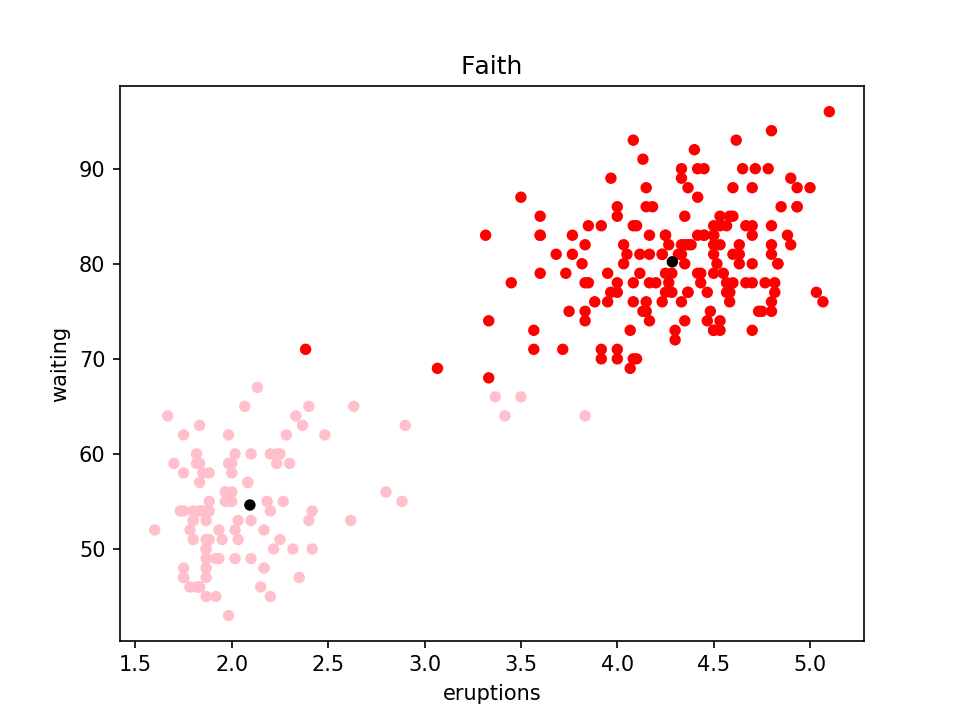

<IPython.core.display.Javascript object>


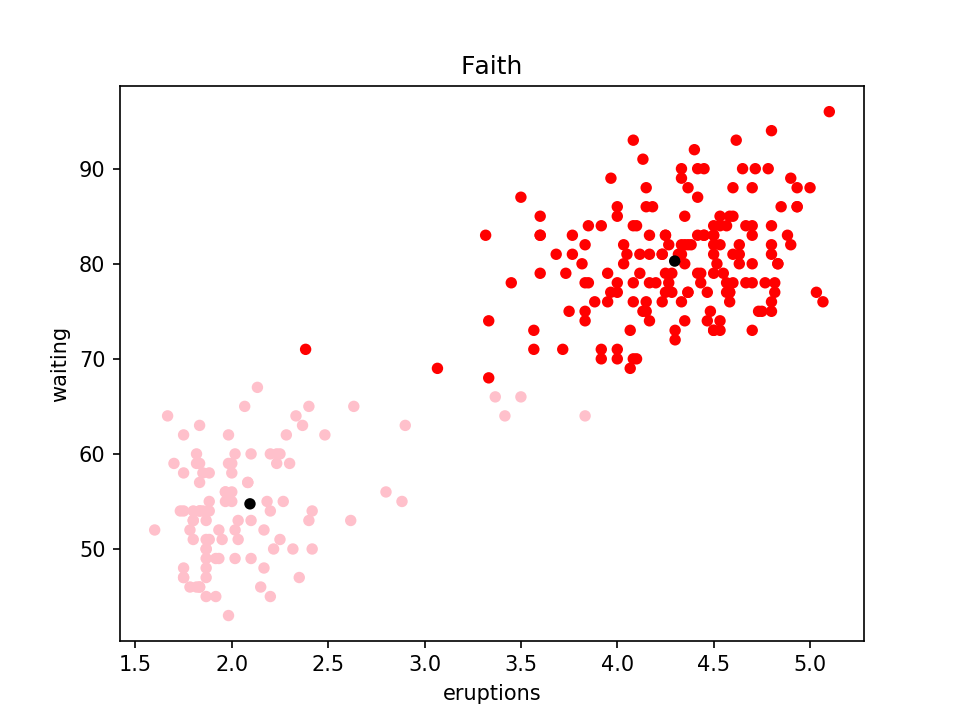

In [10]:
for i in range(5):
    new_w = [faith[faith.win_color == cl.color].waiting.mean() for cl in clusters.itertuples()]
    new_e = [faith[faith.win_color == cl.color].eruptions.mean() for cl in clusters.itertuples()]
    
    if sum(clusters['waiting'] - new_w) == 0 and sum(clusters['eruptions'] - new_e) == 0.0:
        break
    
    clusters['waiting'] = new_w
    clusters['eruptions'] = new_e
    win_colors = []
    for point in faith.itertuples():
        win_cluster = None
        win_score = float('inf')

        for i, cl in enumerate(clusters.itertuples()):
            dist = ((point.eruptions - cl.eruptions)**2 + (point.waiting - cl.waiting)**2)**(1/2)
            if dist < win_score:
                win_cluster = cl
                win_score = dist
        win_colors.append(win_cluster.color)
    
    faith['win_color'] = win_colors
    
    plt = faith.plot.scatter('eruptions', 'waiting', title='Faith', color=faith['win_color'])
    plot = clusters.plot.scatter('eruptions', 'waiting', ax=plt, color=['black', 'black'], subplots=True)

